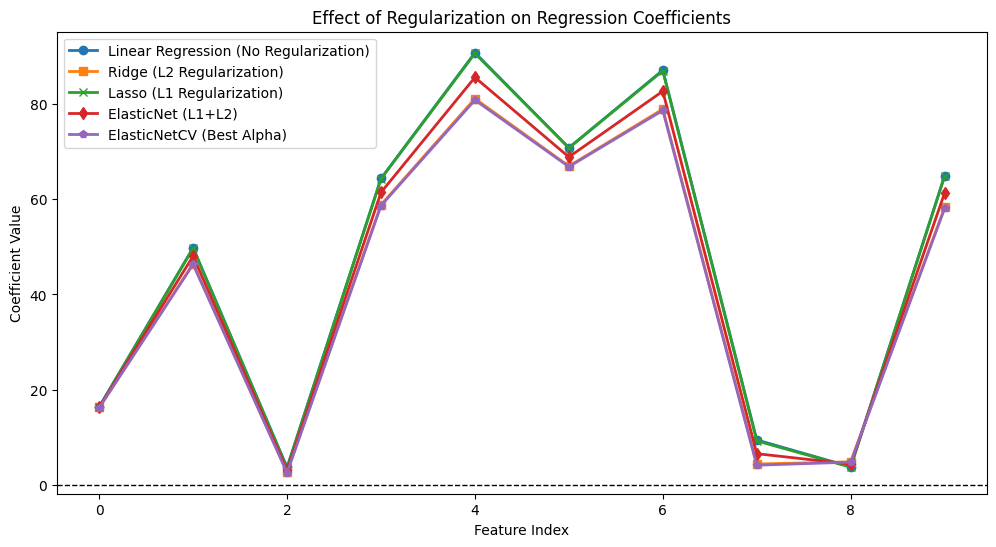

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, ElasticNetCV
from sklearn.datasets import make_regression
from sklearn.preprocessing import StandardScaler

# Generate synthetic data
np.random.seed(42)
X, y, true_coef = make_regression(n_samples=100, n_features=10, noise=10, coef=True)

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train models
lin_reg = LinearRegression().fit(X_scaled, y)  # No regularization
ridge_reg = Ridge(alpha=10).fit(X_scaled, y)   # L2 regularization
lasso_reg = Lasso(alpha=0.1).fit(X_scaled, y)  # L1 regularization
elastic_reg = ElasticNet(alpha=0.1, l1_ratio=0.5).fit(X_scaled, y)  # L1 + L2 regularization
elastic_cv = ElasticNetCV(l1_ratio=0.5, cv=5).fit(X_scaled, y)  # Auto-selects best alpha

# Get coefficients
coef_lin = lin_reg.coef_
coef_ridge = ridge_reg.coef_
coef_lasso = lasso_reg.coef_
coef_elastic = elastic_reg.coef_
coef_elastic_cv = elastic_cv.coef_

# Plot coefficients
plt.figure(figsize=(12, 6))
plt.plot(coef_lin, "o-", label="Linear Regression (No Regularization)", linewidth=2)
plt.plot(coef_ridge, "s-", label="Ridge (L2 Regularization)", linewidth=2)
plt.plot(coef_lasso, "x-", label="Lasso (L1 Regularization)", linewidth=2)
plt.plot(coef_elastic, "d-", label="ElasticNet (L1+L2)", linewidth=2)
plt.plot(coef_elastic_cv, "p-", label="ElasticNetCV (Best Alpha)", linewidth=2)
plt.axhline(0, color="black", linestyle="--", linewidth=1)

plt.xlabel("Feature Index")
plt.ylabel("Coefficient Value")
plt.title("Effect of Regularization on Regression Coefficients")
plt.legend()
plt.show()
